In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from net.model import Model
from net.layer import Dense
from net.activations import ReLU, TanH, Softmax, Sigmoid
from net.optimizers import GradientDescent, Momentum, AdaGrad, RMSProp, Adam
from net.loss import CategoricalCrossEntropy, MSE

train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

def parse_df(df):
    values = df['label'].values
    n_values = np.max(values) + 1
    y = np.eye(n_values)[values]
    
    df = df.drop('label', axis=1)
    x = df.to_numpy()
    return x, y


x_test, y_test = parse_df(test_df)
x_train, y_train = parse_df(train_df)
PATH = "./models/model.pkl"

In [6]:
print(y_train.shape)
print(x_train.shape)

(60000, 10)
(60000, 784)


[1 / 20] - Loss: 0.00243520230537949 | Acc: 80.25166666666667 | TestAcc: 79.95
[2 / 20] - Loss: 0.0014650533256231801 | Acc: 85.92833333333333 | TestAcc: 85.53
[3 / 20] - Loss: 0.001238627993375209 | Acc: 87.32 | TestAcc: 86.77
[4 / 20] - Loss: 0.0012311686175223294 | Acc: 88.30666666666667 | TestAcc: 87.32
[5 / 20] - Loss: 0.0012543829093838539 | Acc: 88.84833333333333 | TestAcc: 87.49
[6 / 20] - Loss: 0.0011824148871154496 | Acc: 89.145 | TestAcc: 87.67
[7 / 20] - Loss: 0.0011441438420996747 | Acc: 89.53333333333333 | TestAcc: 87.94999999999999
[8 / 20] - Loss: 0.001121364758018751 | Acc: 89.88333333333334 | TestAcc: 88.22
[9 / 20] - Loss: 0.0011411453089418878 | Acc: 90.16333333333333 | TestAcc: 88.42
[10 / 20] - Loss: 0.0011580872634131699 | Acc: 90.32166666666667 | TestAcc: 88.53
[11 / 20] - Loss: 0.0011537054630627727 | Acc: 90.65166666666667 | TestAcc: 88.53999999999999
[12 / 20] - Loss: 0.0011869942734775906 | Acc: 90.96333333333332 | TestAcc: 88.79
[13 / 20] - Loss: 0.00116024

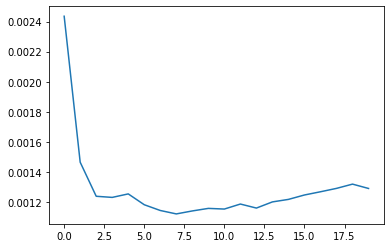

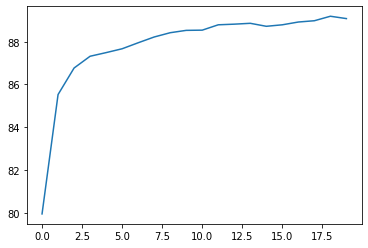

[ SAVED ] To './models/model.pkl'


In [62]:

model = Model([
    Dense(784, 128),
    ReLU(),
    Dense(128, 64),
    ReLU(),
    Dense(64, 10),
    Sigmoid(),
])

model.compile(loss=CategoricalCrossEntropy(), optimizer=Adam(model, learning_rate=4e-3, beta=0.9, lam=0.9))

loss_hist, acc_hist, test_acc_hist = model.fit(
    x_train, y_train,
    epochs=20, batch_size=200, log_freq = 1
    , test_x=x_test, test_y=y_test
)

plt.plot(loss_hist)
plt.show()

plt.plot(test_acc_hist)
plt.show()

model.save(path=PATH)

In [7]:
model = Model.load("./models/model.pkl")
print(f"Accuracy: {model.accuracy(x_test, y_test)}")

Accuracy: 89.08
